In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import joblib
import os

In [3]:
# 2. Load Dataset
df = pd.read_csv("salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Software Engineer,210000,USD,210000,US,0,US,M
1,2025,MI,FT,Software Engineer,170000,USD,170000,US,0,US,M
2,2025,SE,FT,Engineer,200000,USD,200000,US,0,US,M
3,2025,SE,FT,Engineer,150000,USD,150000,US,0,US,M
4,2025,SE,FT,Machine Learning Scientist,260000,USD,260000,US,100,US,M


In [4]:
df.shape

(139751, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139751 entries, 0 to 139750
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           139751 non-null  int64 
 1   experience_level    139751 non-null  object
 2   employment_type     139751 non-null  object
 3   job_title           139751 non-null  object
 4   salary              139751 non-null  int64 
 5   salary_currency     139751 non-null  object
 6   salary_in_usd       139751 non-null  int64 
 7   employee_residence  139751 non-null  object
 8   remote_ratio        139751 non-null  int64 
 9   company_location    139751 non-null  object
 10  company_size        139751 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.7+ MB


In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,139751.000000,1.397510e+05,139751.000000,139751.000000
mean,2024.388062,1.629276e+05,157426.593048,20.999850
std,0.678400,2.134696e+05,74120.666833,40.659869
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146000.000000,0.000000
75%,2025.000000,1.986000e+05,197500.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
df.nunique()

work_year                 6
experience_level          4
employment_type           4
job_title               405
salary                11592
salary_currency          26
salary_in_usd         12807
employee_residence      102
remote_ratio              3
company_location         95
company_size              3
dtype: int64

c:\Users\vedan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


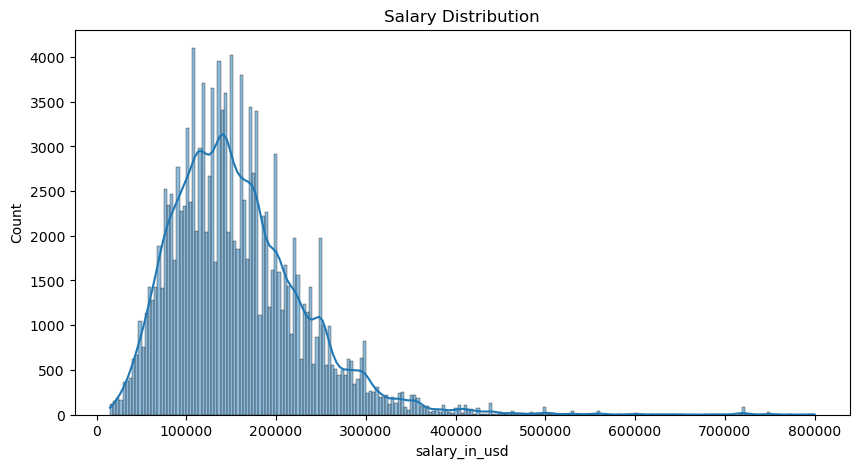

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df['salary_in_usd'], kde=True)
plt.title("Salary Distribution")
plt.show()

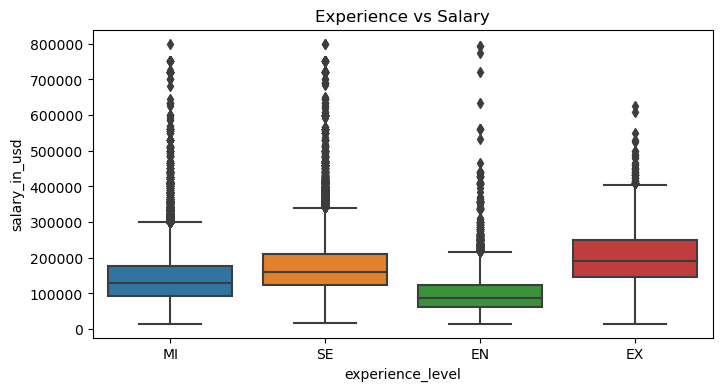

In [10]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title("Experience vs Salary")
plt.show()

In [11]:
df.drop(columns=["salary", "salary_currency"], inplace=True)

In [12]:
X = df.drop("salary_in_usd", axis=1)
y = df["salary_in_usd"]

In [13]:
# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [14]:
print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)


Categorical Columns: ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
Numerical Columns: ['work_year', 'remote_ratio']


In [15]:
# Create preprocessing pipelines for both numerical and categorical data

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

In [16]:
# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Models 

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

In [19]:
results = []

for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    })

    print(f"{name} Evaluation:")
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
    print("-" * 30)

LinearRegression Evaluation:
MAE: 46156.59, MSE: 3991548917.82, RMSE: 63178.71, R²: 0.28
------------------------------
DecisionTree Evaluation:
MAE: 45514.76, MSE: 3932139937.44, RMSE: 62706.78, R²: 0.30
------------------------------
RandomForest Evaluation:
MAE: 45318.93, MSE: 3895019862.83, RMSE: 62410.09, R²: 0.30
------------------------------
XGBoost Evaluation:
MAE: 45396.29, MSE: 3894212608.00, RMSE: 62403.63, R²: 0.30
------------------------------


In [20]:
# 10. Compare Models
results_df = pd.DataFrame(results).sort_values("R2 Score", ascending=False)
results_df

,Model,MAE,MSE,RMSE,R2 Score
3,XGBoost,45396.292969,3.894213e+09,62403.626561,0.302113
2,RandomForest,45318.925936,3.895020e+09,62410.094238,0.301969
1,DecisionTree,45514.760286,3.932140e+09,62706.777444,0.295316
0,LinearRegression,46156.586623,3.991549e+09,63178.706206,0.284670


In [21]:
best_model_name = results_df.iloc[0]["Model"]
final_model = models[best_model_name]

In [22]:
final_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", final_model)
])

final_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['work_year',
                                                   'remote_ratio']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['experience_level',
                                                   'employment_type',
                                                   'job_title',
                                                   'employee_residence',
                                                   'company_location',
                                                   'company_size'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsam...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [ ]:
# Save model pipeline
os.makedirs("artifacts", exist_ok=True)
joblib.dump(final_pipeline, "artifacts/model_pipeline.pkl")
print("Model pipeline saved to artifacts/model_pipeline.pkl")


✅ Model pipeline saved to artifacts/model_pipeline.pkl
